# Nicolas Ducros. ISTE book chapter
##  Imports

In [6]:
from __future__ import print_function, division
import torch
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from pathlib import Path
import spyrit.misc.walsh_hadamard as wh
from spyrit.learning.model_Had_DCAN import *# compNet, Stat_had, Weight_Decay_Loss

## User-defined global parameters 

In [7]:
#- Acquisition
img_size = 64 # image size
batch_size =256

#- Model and data paths
model_root = Path('./models/')
stats_root = Path('./stats/')
data_root = Path('./data/')

#- Save plot using type 1 font
plt.rcParams['pdf.fonttype'] = 42

## Load STL-10 dataset

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(7)

transform = transforms.Compose(
    [transforms.functional.to_grayscale,
     transforms.Resize((img_size, img_size)),
     transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])


trainset = \
    torchvision.datasets.STL10(root=data_root, split='train+unlabeled',download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)

testset = \
    torchvision.datasets.STL10(root=data_root, split='test',download=True, transform=transform)
testloader =  torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False)

dataloaders = {'train':trainloader, 'val':testloader}

Files already downloaded and verified
Files already downloaded and verified


## Hadamard from fht

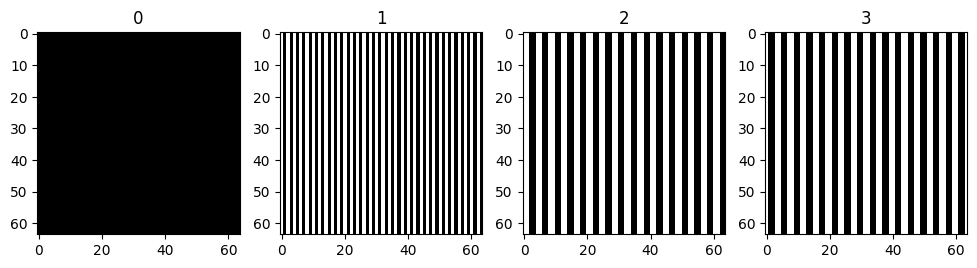

In [9]:
H = Hadamard_Transform_Matrix(img_size)

f, axs = plt.subplots(1, 4, figsize=(12,8),  dpi= 100)
for i in range(4):
    axs[i].imshow(np.reshape(H[i,:],(img_size, img_size)), cmap='gray');
    axs[i].set_title(f'{i}');

In [10]:
from sympy import fwht, ifwht

for i in range(8):
    x = np.zeros(8)
    x[i]= 1
    print(fwht(x))
    

[1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000]
[1.00000000000000, -1.00000000000000, 1.00000000000000, -1.00000000000000, 1.00000000000000, -1.00000000000000, 1.00000000000000, -1.00000000000000]
[1.00000000000000, 1.00000000000000, -1.00000000000000, -1.00000000000000, 1.00000000000000, 1.00000000000000, -1.00000000000000, -1.00000000000000]
[1.00000000000000, -1.00000000000000, -1.00000000000000, 1.00000000000000, 1.00000000000000, -1.00000000000000, -1.00000000000000, 1.00000000000000]
[1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, -1.00000000000000, -1.00000000000000, -1.00000000000000, -1.00000000000000]
[1.00000000000000, -1.00000000000000, 1.00000000000000, -1.00000000000000, -1.00000000000000, 1.00000000000000, -1.00000000000000, 1.00000000000000]
[1.00000000000000, 1.00000000000000, -1.00000000000000, -1.00000000000000, -1.00000000000000, -1.0000000000000

## scipy Package

In [11]:
from scipy.linalg import hadamard
H = hadamard(8)

for i in range(8):
    print(H[i,:]);

[1 1 1 1 1 1 1 1]
[ 1 -1  1 -1  1 -1  1 -1]
[ 1  1 -1 -1  1  1 -1 -1]
[ 1 -1 -1  1  1 -1 -1  1]
[ 1  1  1  1 -1 -1 -1 -1]
[ 1 -1  1 -1 -1  1 -1  1]
[ 1  1 -1 -1 -1 -1  1  1]
[ 1 -1 -1  1 -1  1  1 -1]


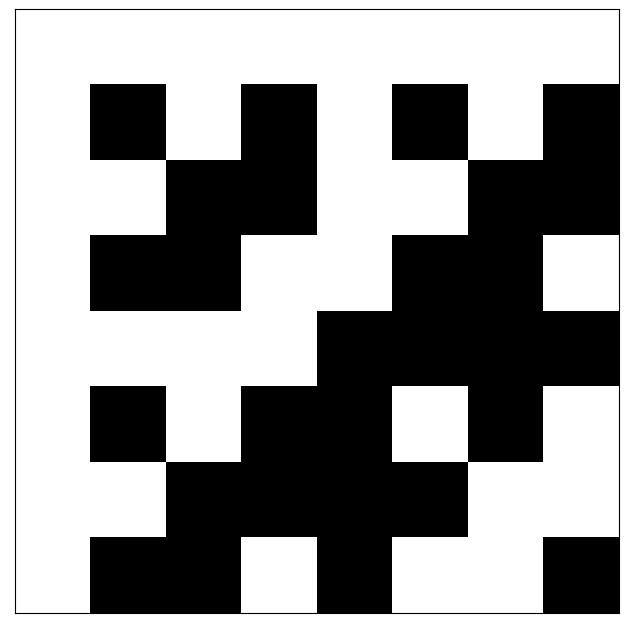

In [12]:
f, a = plt.subplots(1,1, figsize=(8,8),  dpi= 100) 

a.imshow(H, cmap='gray');
a.get_xaxis().set_visible(False)
a.get_yaxis().set_visible(False)
a.set_aspect('equal')
f.subplots_adjust(wspace=0, hspace=0.05)
#plt.savefig("Hadamard_natural_8.png", bbox_inches=0)

## Walsh ordered from spyrit

In [16]:
H = wh.walsh_matrix(8)

for i in range(8):
    print(H[i,:]);

[1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.  1.  1.  1. -1. -1. -1. -1.]
[ 1.  1. -1. -1. -1. -1.  1.  1.]
[ 1.  1. -1. -1.  1.  1. -1. -1.]
[ 1. -1. -1.  1.  1. -1. -1.  1.]
[ 1. -1. -1.  1. -1.  1.  1. -1.]
[ 1. -1.  1. -1. -1.  1. -1.  1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.]


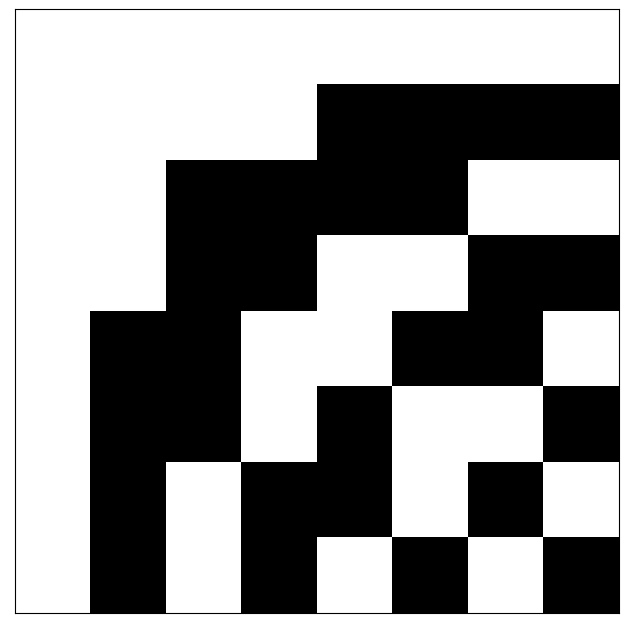

In [17]:
f, a = plt.subplots(1,1, figsize=(8,8),  dpi= 100) 

a.imshow(H, cmap='gray');
a.get_xaxis().set_visible(False)
a.get_yaxis().set_visible(False)
a.set_aspect('equal')
f.subplots_adjust(wspace=0, hspace=0.05)
#plt.savefig("Hadamard_Walsh_8.png", bbox_inches=0)

## Walsh ordered in 2D

1.0


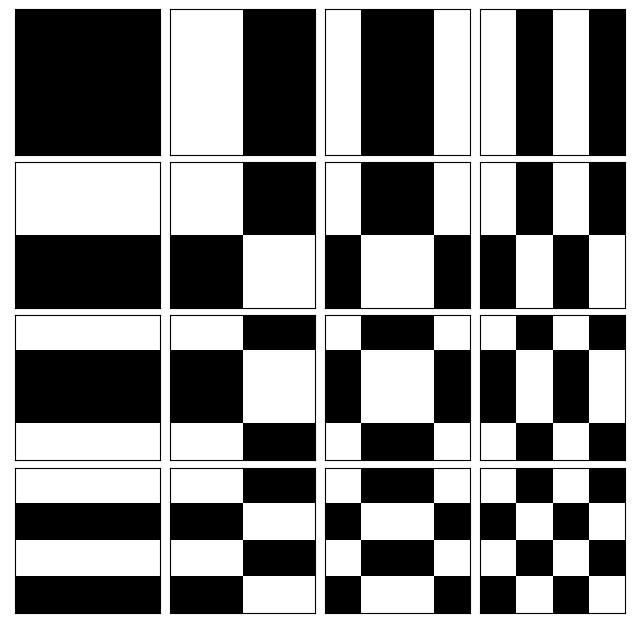

In [19]:
img_size = 4
H = wh.walsh2_matrix(img_size)
print(H[0,0])

f, axs = plt.subplots(4, 4, figsize=(8,8),  dpi= 100) 
for ii in range(4):
    for jj in range(4):
        ind = 4*ii + jj
        axs[ii,jj].imshow(np.reshape(H[ind,:],(img_size, img_size)), cmap='gray');
        #axs[ii,jj].set_title(f'{ind}');
        axs[ii,jj].get_xaxis().set_visible(False)
        axs[ii,jj].get_yaxis().set_visible(False)
        axs[ii,jj].set_aspect('equal')
        #axs[ii,jj].set_xticklabels([])
        #axs[ii,jj].set_yticklabels([])
f.subplots_adjust(wspace=0, hspace=0.05)
#f.savefig("Hadamard_Walsh_4x4.png", bbox_inches=0)


## Walsh ordered 2D on STL-10

1.0


Text(0.5, 1.0, 'difference')

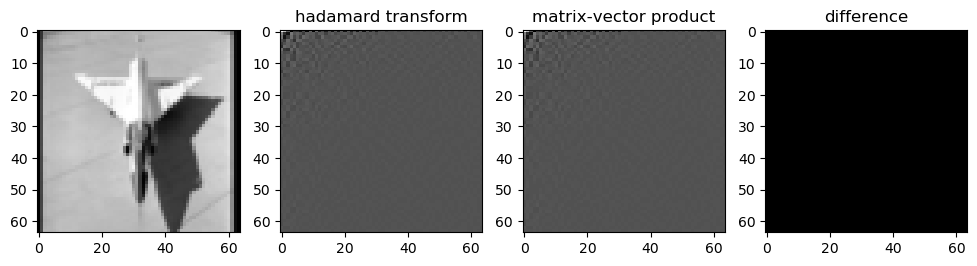

In [12]:
inputs, classes = next(iter(dataloaders['val']))
img = inputs[81, 0, :, :];
img = img.cpu().detach().numpy()

img_size = 64
H = walsh_ordered2_Matrix(img_size)
H1 = wh.walsh_ordered(len(img))
had0 = walsh_ordered2(img,H1)
had1 = np.reshape(np.matmul(H,img.ravel()), img.shape)
err = had0 - had1
print(had0[0,0]/had1[0,0])

f, axs = plt.subplots(1, 4, figsize=(12,8),  dpi= 100)
axs[0].imshow(img, cmap='gray'); 
axs[1].imshow(had0, cmap='gray');
axs[2].imshow(had1, cmap='gray');
axs[3].imshow(err, cmap='gray');
axs[1].set_title("hadamard transform")
axs[2].set_title("matrix-vector product")
axs[3].set_title("difference")

In [13]:
len(img)

64

0.0


Text(0.5, 1.0, 'difference')

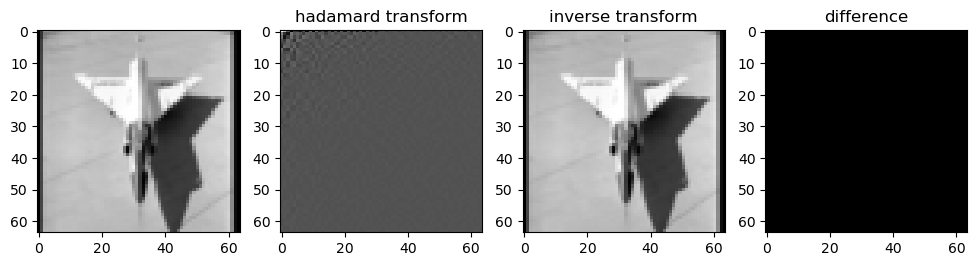

In [14]:
nputs, classes = next(iter(dataloaders['val']))
img = inputs[81, 0, :, :];
img = img.cpu().detach().numpy()

img_size = 64
had = walsh_ordered2(img)
im1 = inverse_walsh_ordered2(had)
err = img - im1
print(np.linalg.norm(err)/np.linalg.norm(img))

f, axs = plt.subplots(1, 4, figsize=(12,8),  dpi= 100)
axs[0].imshow(img, cmap='gray'); 
axs[1].imshow(had, cmap='gray');
axs[2].imshow(im1, cmap='gray');
axs[3].imshow(err, cmap='gray');
axs[1].set_title("hadamard transform")
axs[2].set_title("inverse transform")
axs[3].set_title("difference")

In [15]:
stats_root / Path("Cov_{}x{}.npy".format(img_size, img_size))

WindowsPath('stats/Cov_64x64.npy')

 ## Load covariance matrix

In [38]:
print('Loading Cov and Mean') 
stats_root = Path('./stats_ordered/')
Cov_had = np.load(stats_root / Path("Cov_{}x{}.npy".format(img_size, img_size)))
Abs_had = np.load(stats_root / Path("Abs_{}x{}.npy".format(img_size, img_size)))

Loading Cov and Mean


In [28]:
def Variance_ranking(Cov):
    """
        Returns rank of the variance given the covariance
    """
    Var = Cov2Var(Cov)
    (nx, ny) = Var.shape;
    ind = rankdata(-Var, method = 'ordinal').reshape(nx, ny);
    return ind

def Variance_mask(Cov,eta=0.5):
    """Return a mask indicating the coefficients with maximum variance

    Args:
        Cov (np.array): Covariance matrix.
        eta (float): Sampling ratio between 0 and 1

    Returns:
        mask (boolean array): 1 to keep, 0 otherwise
    """

    ind = Variance_ranking(Cov)
    (nx, ny) = ind.shape;
    M = math.ceil(eta*ind.size)
    print(M)
    mask = np.zeros_like(ind, dtype=bool)
    mask[ind<M] = 1
    
    return mask
    

In [34]:
import math

def Abs_ranking(Abs):
    """
        Returns rank of the absolute value
    """
    (nx, ny) = Abs.shape;
    ind = rankdata(-Abs, method = 'ordinal').reshape(nx, ny);
    return ind

def Abs_mask(Abs,eta=0.5):
    """Return a mask indicating the coefficients with maximum absolute value

    Args:
        Abs (np.array): Absolute value matrix.
        eta (float): Sampling ratio between 0 and 1

    Returns:
        mask (boolean array): 1 to keep, 0 otherwise
    """

    ind = Abs_ranking(Abs)
    (nx, ny) = ind.shape;
    M = math.ceil(eta*ind.size)
    print(M)
    mask = np.zeros_like(ind, dtype=bool)
    mask[ind<M] = 1
    
    return mask

2048
1024


Text(0.5, 1.0, 'mask 0.25')

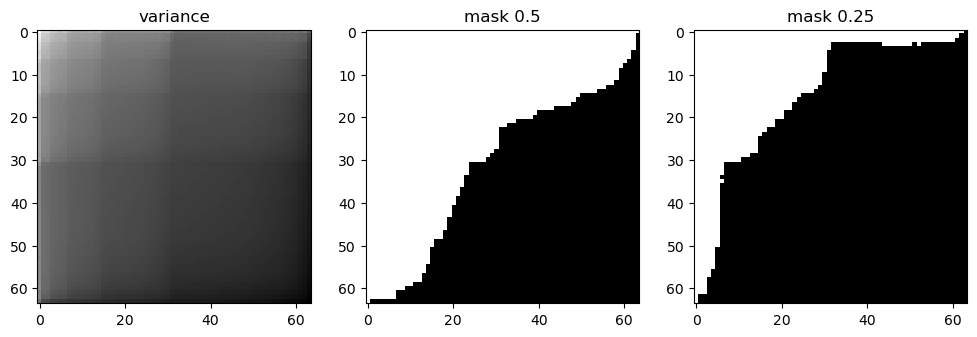

In [39]:
eta1 = .5
eta2 = .25
mask1 = Variance_mask(Cov_had,eta1)
mask2 = Variance_mask(Cov_had,eta2)
var = Cov2Var(Cov_had)

f, axs = plt.subplots(1, 3, figsize=(12,8),  dpi= 100)
axs[0].imshow(np.log(var), cmap='gray'); 
axs[1].imshow(mask1, cmap='gray');
axs[2].imshow(mask2, cmap='gray');
axs[0].set_title("variance")
axs[1].set_title(f"mask {eta1}")
axs[2].set_title(f"mask {eta2}")


2048
1024


Text(0.5, 1.0, 'mask 0.25')

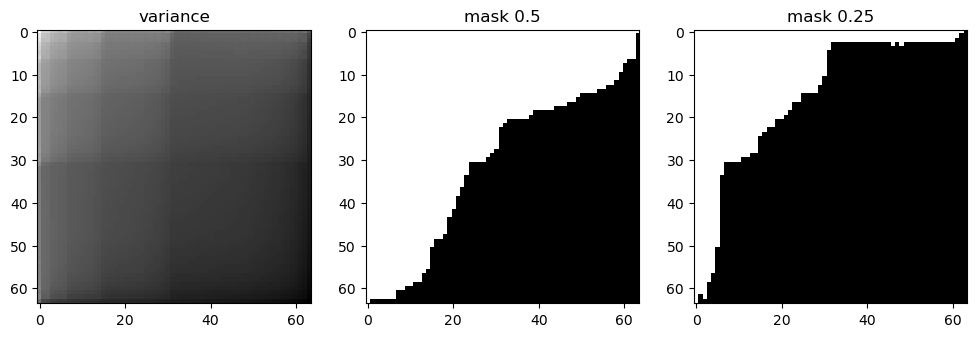

In [36]:
eta1 = .5
eta2 = .25
mask1 = Abs_mask(Abs_had,eta1)
mask2 = Abs_mask(Abs_had,eta2)

f, axs = plt.subplots(1, 3, figsize=(12,8),  dpi= 100)
axs[0].imshow(np.log(Abs_had), cmap='gray'); 
axs[1].imshow(mask1, cmap='gray');
axs[2].imshow(mask2, cmap='gray');
axs[0].set_title("variance")
axs[1].set_title(f"mask {eta1}")
axs[2].set_title(f"mask {eta2}")


In [ ]:
ind = Variance_mask(Cov_had)
print(ind)

f, axs = plt.subplots(1, 4, figsize=(12,8),  dpi= 100)
axs[0].imshow(img, cmap='gray'); 
axs[1].imshow(had0, cmap='gray');
axs[2].imshow(had1, cmap='gray');
axs[3].imshow(err, cmap='gray');
axs[1].set_title("hadamard transform")
axs[2].set_title("matrix-vector product")
axs[3].set_title("difference")

In [24]:
A =np.array([[1, 2, -3], [-4, 5, 6]])
print(A)
print(A.shape)
B = abs(A)
print(B)

[[ 1  2 -3]
 [-4  5  6]]
(2, 3)
[[1 2 3]
 [4 5 6]]


### Statistical completion

In [ ]:
suffix = '_N_{}_M_{}_epo_{}_lr_{}_sss_{}_sdr_{}_bs_{}_reg_{}'.format(\
         img_size, M, num_epochs, lr, step_size, gamma, batch_size, reg)

model = compNet(img_size,M, Mean_had,Cov_had)
model = model.to(device)
title = model_root/('NET_c0mp'+ suffix)
load_net(title, model, device)

psnr_net_prob, psnr_prob = dataset_psnr(dataloaders['val'], model, device);
     
print_mean_std(psnr_net_prob,'compNet: ')
print_mean_std(psnr_prob,'comp: ')

print('Number of trainable parameters: {}'.format(count_trainable_param(model)))
print('Total number of parameters: {}'.format(count_param(model)))

### Pseudo Inverse

In [ ]:
model = compNet(img_size,M, Mean_had,Cov_had,2)
model = model.to(device)
title = model_root/('NET_pinv'+ suffix)
load_net(title, model, device)

psnr_net_pinv, psnr_pinv = dataset_psnr(dataloaders['val'], model, device)

print_mean_std(psnr_net_pinv,'pinvNet: ')
print_mean_std(psnr_pinv,'PInv: ')
print('Number of trainable parameters: {}'.format(count_trainable_param(model)))
print('Total number of parameters: {}'.format(count_param(model)))

### Fully learnt (free Net)

In [ ]:
model = compNet(img_size,M, Mean_had,Cov_had,3)
model = model.to(device)
title = model_root/('NET_free'+ suffix)
load_net(title, model, device)
#    
psnr_net_free, psnr_free = dataset_psnr(dataloaders['val'], model, device)

print_mean_std(psnr_net_free,'freeNet: ')
print_mean_std(psnr_free,'free: ')

print('Number of trainable parameters: {}'.format(count_trainable_param(model)))
print('Total number of parameters: {}'.format(count_param(model)))

### Summary: PSNR boxplot (Fig. 3)

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure()
sns.set_style("whitegrid")
ax = sns.boxplot(data=pd.DataFrame([psnr_pinv, psnr_prob, psnr_net_pinv, psnr_net_prob, psnr_net_free]).T)
ax.set_xticklabels(['pinv', 'comp', 'pinvNET', 'compNET', 'freeNET']);
ax.set_ylabel('PSNR');
#plt.savefig("boxplot_sns.pdf")

## Measurement scatter plot (Fig. 2, not exactely the same as in the manuscript)

In [ ]:
#%% Load measured data
meas = dataset_meas(dataloaders['val'], model, device) #dataloaders['train']
meas = np.array(meas)

#%%
n1 = 2; #2,12 or 2,7
n2 = 7;

sns.jointplot(meas[:,n1], meas[:,n2], kind='reg', ratio=3)#, xlim=[-2,2], ylim=[-5, 5])
plt.xlabel('Hadamard coefficient #{}'.format(n1))
plt.ylabel('Hadamard coefficient #{}'.format(n2))
plt.show()

## Loss during training (Fig. 4, not exactely the same as in the manuscript)

In [ ]:
# Load training history
train_path = model_root/('TRAIN_c0mp'+suffix+'.pkl')
train_net_prob = read_param(train_path)
train_path = model_root/('TRAIN_pinv'+suffix+'.pkl')
train_net_pinv = read_param(train_path)
train_path = model_root/('TRAIN_free'+suffix+'.pkl')
train_net_free = read_param(train_path)

plt.rcParams.update({'font.size': 20})

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Time (epochs)')
ax.set_ylabel('Loss (MSE)')
ax.plot(train_net_pinv.val_loss,'g--', linewidth=4)
ax.plot(train_net_prob.val_loss,'r-.', linewidth=4)
ax.plot(train_net_free.val_loss,'m', linewidth=4)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
plt.grid(True)
ax.legend(('pinvNET', 'compNET', 'freeNET'),  loc='upper right')
#fig.savefig('loss_test.pdf', dpi=fig.dpi, bbox_inches='tight')# pad_inches=0.1)